## Discovering Top Universities' Most Important Attributes of a College Application
Our goal is to learn which parts of a graduate application are most important for getting accepted into a top university. We will describe the average student, in terms of performance, who is very likely to be admitted into a top university. We will also analyze whether different parts of the application are more important than others depending on the university ranking.

Datasource: Graduate Admissions 2 (https://www.kaggle.com/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv)

Preview of the data:

In [1]:
%%bigquery
SELECT * FROM `ba775-team-8a-project.project_work.graduate_admissions_data` LIMIT 5

,Serial_No_,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
0,169,293,97,2,2.0,4.0,7.80,1,0.64
1,118,290,104,4,2.0,2.5,7.46,0,0.45
2,29,295,93,1,2.0,2.0,7.20,0,0.46
3,458,295,99,1,2.0,1.5,7.57,0,0.37
4,409,297,101,3,2.0,4.0,7.67,1,0.57


Schema Details: 
- GRE Score is out of 340
- TOEFL Score is out of 120
- University Rating is out of 5
- SOP: Statement of Purpose (out of 5)
- LOR: Letter of Recommendation (out of 5)
- CGPA: Undergraduate GPA (out of 10)
- Research is 0 or 1 (no or yes)
- Chance of admit ranges from 0 to 1

What are the average scores for each aspect of the application for those likely (0.6+) at getting into a university (rated 5, 4, 3, 2, or 1 out of 5)?

In [2]:
%%bigquery
SELECT University_Rating, AVG(GRE_Score) AS Avg_GRE, AVG(TOEFL_Score) AS Avg_TOEFL,
AVG(SOP) AS Avg_SOP, AVG(LOR_) AS Avg_LOR, (AVG(CGPA)/10.0 * 4.0) AS GPA,
AVG(Research) AS Avg_Research
FROM `ba775-team-8a-project.project_work.graduate_admissions_data` 
WHERE Chance_of_Admit_ > 0.6
GROUP BY University_Rating
ORDER BY University_Rating DESC

,University_Rating,Avg_GRE,Avg_TOEFL,Avg_SOP,Avg_LOR,GPA,Avg_Research
0,5,327.890411,113.438356,4.479452,4.404110,3.711233,0.876712
1,4,325.031250,111.718750,4.145833,4.020833,3.606917,0.833333
2,3,315.971831,106.732394,3.330986,3.450704,3.426254,0.563380
3,2,311.590361,104.698795,2.813253,3.102410,3.336337,0.325301
4,1,313.444444,103.333333,2.444444,3.111111,3.340444,0.777778


When looking at the entire pool of applicants for each rating of university, what are the Average GRE Scores and Admit Chance?

In [3]:
%%bigquery
SELECT University_Rating, AVG(GRE_Score) AS Avg_GRE, AVG(Chance_of_Admit_) AS Avg_AdmitChance
FROM `ba775-team-8a-project.project_work.graduate_admissions_data` 

GROUP BY University_Rating
ORDER BY University_Rating DESC

,University_Rating,Avg_GRE,Avg_AdmitChance
0,5,327.890411,0.888082
1,4,323.304762,0.801619
2,3,315.030864,0.702901
3,2,309.134921,0.626111
4,1,304.911765,0.562059


What are the average TOEFL Scores and Admit Chance of those who applied to a #1 (5 out of 5) rated university and other rated universities?

In [4]:
%%bigquery
SELECT University_Rating, AVG(TOEFL_Score) AS Avg_TOEFL, AVG(Chance_of_Admit_) AS Avg_AdmitChance
FROM `ba775-team-8a-project.project_work.graduate_admissions_data` 

GROUP BY University_Rating
ORDER BY University_Rating DESC

,University_Rating,Avg_TOEFL,Avg_AdmitChance
0,5,113.438356,0.888082
1,4,110.961905,0.801619
2,3,106.314815,0.702901
3,2,103.444444,0.626111
4,1,100.205882,0.562059


What is the average GPA and Admit Chance of those who applied to a #1 (5 out of 5) rated university and other rated universities?

In [3]:
%%bigquery
SELECT University_Rating, (AVG(CGPA)/10.0 * 4.0) AS GPA, AVG(Chance_of_Admit_) AS Avg_AdmitChance
FROM `ba775-team-8a-project.project_work.graduate_admissions_data` 
GROUP BY University_Rating
ORDER BY University_Rating DESC

,University_Rating,GPA,Avg_AdmitChance
0,5,3.711233,0.888082
1,4,3.574667,0.801619
2,3,3.400049,0.702901
3,2,3.271111,0.626111
4,1,3.119412,0.562059


Which parts of the application have a high correlation with chance of admit?

Overall, and then for each University Rating separately

In [9]:
%%bigquery
SELECT CORR(GRE_Score, Chance_of_Admit_) as GRE_Admit, CORR(TOEFL_Score, Chance_of_Admit_) as TOEFL_Admit,
CORR(University_Rating, Chance_of_Admit_) as UR_Admit, CORR(SOP, Chance_of_Admit_) as SOP_Admit, 
CORR(LOR_, Chance_of_Admit_) as LOR_Admit, CORR(CGPA, Chance_of_Admit_) as CGPA_Admit, 
CORR(Research, Chance_of_Admit_) as R_Admit

FROM `ba775-team-8a-project.project_work.graduate_admissions_data` 

,GRE_Admit,TOEFL_Admit,UR_Admit,SOP_Admit,LOR_Admit,CGPA_Admit,R_Admit
0,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871


In [8]:
%%bigquery
SELECT University_Rating, CORR(GRE_Score, Chance_of_Admit_) as GRE_Admit, CORR(TOEFL_Score, Chance_of_Admit_) as TOEFL_Admit,
CORR(SOP, Chance_of_Admit_) as SOP_Admit, 
CORR(LOR_, Chance_of_Admit_) as LOR_Admit, CORR(CGPA, Chance_of_Admit_) as CGPA_Admit, 
CORR(Research, Chance_of_Admit_) as R_Admit
FROM `ba775-team-8a-project.project_work.graduate_admissions_data` 
GROUP BY University_Rating
ORDER BY University_Rating DESC

,University_Rating,GRE_Admit,TOEFL_Admit,SOP_Admit,LOR_Admit,CGPA_Admit,R_Admit
0,5,0.789476,0.795353,0.392687,0.489418,0.855090,0.725914
1,4,0.816029,0.779765,0.720851,0.467369,0.881721,0.514150
2,3,0.563197,0.487900,0.204828,0.319985,0.702175,0.351699
3,2,0.581736,0.582436,0.235972,0.312182,0.698228,0.222859
4,1,0.667048,0.569541,0.270152,0.657514,0.814415,0.408101


If aiming for a 80% chance of admittance into a 5 out of 5 rated university, which attribute has the highest correlation with admittance?

In [6]:
%%bigquery
SELECT ROUND(CORR(GRE_Score, Chance_of_Admit_),2) as GRE_Admit, ROUND(CORR(TOEFL_Score, Chance_of_Admit_), 2) as TOEFL_Admit, ROUND(CORR(SOP, Chance_of_Admit_), 2) as SOP_Admit, 
ROUND(CORR(LOR_, Chance_of_Admit_), 2) as LOR_Admit, ROUND(CORR(CGPA, Chance_of_Admit_), 2) as CGPA_Admit, 
ROUND(CORR(Research, Chance_of_Admit_), 2) as R_Admit

FROM `ba775-team-8a-project.project_work.graduate_admissions_data` 
WHERE Chance_of_Admit_ >= .8 AND University_Rating = 5

,GRE_Admit,TOEFL_Admit,SOP_Admit,LOR_Admit,CGPA_Admit,R_Admit
0,0.6,0.69,0.26,0.25,0.81,0.08


Since the GPA, GRE Score, and TOEFL Score have the highest correlation coeffcient for chance of admit at a top school (5), what is the standard deviation of these factors? (when chance of admit is greater than 0.8)

In [5]:
%%bigquery
SELECT University_Rating, ROUND(AVG(GRE_Score),2) AS Avg_GRE, ROUND(stddev(GRE_Score),2) as STD_GRE, 
ROUND(AVG(CGPA),2) AS Avg_CGPA, 
ROUND(stddev(CGPA),2) as STD_CGPA, ROUND(AVG(TOEFL_Score),2) AS Avg_TOEFL, ROUND(stddev(TOEFL_Score),2) AS STD_TOEFL
FROM `ba775-team-8a-project.project_work.graduate_admissions_data` 
WHERE Chance_of_Admit_ > 0.8 
GROUP BY University_Rating
ORDER BY University_Rating DESC

,University_Rating,Avg_GRE,STD_GRE,Avg_CGPA,STD_CGPA,Avg_TOEFL,STD_TOEFL
0,5,330.14,6.04,9.38,0.28,114.62,3.42
1,4,328.36,6.50,9.27,0.27,113.61,3.56
2,3,322.88,4.77,9.02,0.20,111.69,4.27
3,2,325.50,5.92,8.90,0.43,112.00,4.69


This shows that about 2/3 of those with a 80%+ chance of being admitted into a top rated university (5), have a GRE Score of 324 and 336 and about 95% of these students have a GRE Score of 318 and 342 (out of 340). As for Undergraduate GPA, 2/3 of them had 9.1 to 9.66 and 95% of them had 8.82 to 9.94 (out of 10). As for TOEFL Score, 2/3 of them scored 111.2 through 118.04 and 95% of them scored 107.78 through 121.46 (out of 120).

Describing the average student who is very likely (0.7+) to get into a top university

In [2]:
%%bigquery
SELECT University_Rating, ROUND(AVG(GRE_Score),2) AS Avg_GRE, ROUND(AVG(TOEFL_Score),2) AS Avg_TOEFL,
AVG(SOP) AS Avg_SOP, ROUND(AVG(LOR_),2) AS Avg_LOR, ROUND(AVG(CGPA),2) AS Avg_CGPA,
ROUND(AVG(Research),2) AS Avg_Research
FROM `ba775-team-8a-project.project_work.graduate_admissions_data` 
WHERE Chance_of_Admit_ >= 0.7 AND University_Rating = 5 or University_Rating = 4
GROUP BY University_Rating
ORDER BY University_Rating DESC

,University_Rating,Avg_GRE,Avg_TOEFL,Avg_SOP,Avg_LOR,Avg_CGPA,Avg_Research
0,5,328.55,113.66,4.492958,4.43,9.30,0.90
1,4,323.30,110.96,4.000000,3.95,8.94,0.78


### Running a Linear Regression Model Using BigQuery ML

Using Chance of Admit as Dependent Variable

> Looking only at Universitys rated 5

In [2]:
%%bigquery
CREATE OR REPLACE MODEL `ba775-team-8a-project.project_work.mlr_model`

OPTIONS
( MODEL_TYPE= 'LINEAR_REG', 
OPTIMIZE_STRATEGY = 'NORMAL_EQUATION',
INPUT_LABEL_COLS= ['Chance_of_Admit_']) AS
SELECT
GRE_Score, TOEFL_Score, SOP, LOR_, 
CGPA, Research, Chance_of_Admit_
FROM
`ba775-team-8a-project.project_work.graduate_admissions_data`
WHERE University_Rating = 5

""


Evaluation of Model

In [2]:
%%bigquery
SELECT * FROM
ML.EVALUATE(MODEL `ba775-team-8a-project.project_work.mlr_model`,
  (SELECT
    Chance_of_Admit_, GRE_Score, TOEFL_Score, SOP, LOR_, 
CGPA, Research
  FROM
    `ba775-team-8a-project.project_work.graduate_admissions_data`))


,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,0.047994,0.004947,0.001898,0.030404,0.751156,0.777685


> Mean absolute error: 0.0480

> Mean squared error: 0.0049

> R-squared: 0.7512



RSME Score for the Model

In [16]:
%%bigquery
SELECT
  SQRT(mean_squared_error) AS rmse
FROM
  ML.EVALUATE(MODEL `ba775-team-8a-project.project_work.mlr_model`,
  (SELECT
    Chance_of_Admit_, GRE_Score, TOEFL_Score, SOP, LOR_, 
CGPA, Research
  FROM
    `ba775-team-8a-project.project_work.graduate_admissions_data`))

,rmse
0,0.070336


Creating an Interpretation Table to Show Weights of Each Variable

In [3]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-team-8a-project.project_work.mlr_interpretation`
AS
SELECT * FROM 
# Info for destandardizing
ML.FEATURE_INFO(MODEL `ba775-team-8a-project.project_work.mlr_model`)
LEFT JOIN
# Model coefficients
ML.WEIGHTS(MODEL `ba775-team-8a-project.project_work.mlr_model`)
ON 
input = processed_input

""


In [15]:
%%bigquery
SELECT *
FROM ML.WEIGHTS(MODEL `ba775-team-8a-project.project_work.mlr_model`)


,processed_input,weight,category_weights
0,GRE_Score,0.001063,[]
1,TOEFL_Score,0.003678,[]
2,SOP,0.028972,[]
3,LOR_,0.003952,[]
4,CGPA,0.070262,[]
5,Research,0.073593,[]
6,__INTERCEPT__,-0.741133,[]


In [4]:
%%bigquery
SELECT * FROM `ba775-team-8a-project.project_work.mlr_interpretation`

,input,min,max,mean,median,stddev,category_count,null_count,processed_input,weight,category_weights
0,GRE_Score,303.00,340.00,327.890411,330.0,8.670771,NaN,0,GRE_Score,0.001063,[]
1,LOR_,3.00,5.00,4.404110,4.5,0.593118,NaN,0,LOR_,0.003952,[]
2,CGPA,7.92,9.91,9.278082,9.3,0.381075,NaN,0,CGPA,0.070262,[]
3,SOP,3.00,5.00,4.479452,4.5,0.509891,NaN,0,SOP,0.028972,[]
4,TOEFL_Score,101.00,120.00,113.438356,114.0,4.536844,NaN,0,TOEFL_Score,0.003678,[]
5,Research,0.00,1.00,0.876712,1.0,0.331042,NaN,0,Research,0.073593,[]


For Universitys rated 5 out of 5:

For every 0.331 (stddev) points the applicant is above the Research score mean of 0.88, we would expect to see the chance of admit to increase by 7.35%

For every 0.381 (stddev) points the applicant is above the Undergraduate GPA mean of 9.28, we would expect to see the chance of admit to increase by 7.03%.

For every 0.510 (stddev) points the applicant is above the Statement of Purpose score mean of 4.48, we would expect to see the chance of admit to increase by 2.90%.

These are the top 3 most meaningful parts of the graduate application for students trying to get into a 5 out of 5 ranked university according to the weights of our linear regression model.

Making a Prediction with the Model

In [7]:
%%bigquery
SELECT * FROM
ML.PREDICT(MODEL `ba775-team-8a-project.project_work.mlr_model`,
  (
  SELECT
    Chance_of_Admit_, GRE_Score, TOEFL_Score, SOP, LOR_, 
CGPA, Research
  FROM
    `ba775-team-8a-project.project_work.graduate_admissions_data`))

LIMIT 10

,predicted_Chance_of_Admit_,Chance_of_Admit_,GRE_Score,TOEFL_Score,SOP,LOR_,CGPA,Research
0,0.622339,0.64,293,97,2.0,4.0,7.80,1
1,0.541486,0.45,290,104,2.0,2.5,7.46,0
2,0.486098,0.46,295,93,2.0,2.0,7.20,0
3,0.532186,0.37,295,99,2.0,1.5,7.57,0
4,0.632166,0.57,297,101,2.0,4.0,7.67,1
5,0.533385,0.51,298,92,2.0,2.0,7.88,0
6,0.508652,0.45,298,97,2.0,3.0,7.21,0
7,0.573708,0.63,299,100,2.0,2.0,8.02,0
8,0.535503,0.42,299,100,2.0,3.0,7.42,0
9,0.563871,0.51,299,100,2.0,2.0,7.88,0


When comparing the predicted chance of admit to the actual chance of admit, one can see that some instances are predicted very closely, while others are a little bit off. This regression model is not perfect, but does have some merit.

## Tableau Dashboard

All worksheets: https://prod-useast-a.online.tableau.com/#/site/soltaniehha/workbooks/253020?:origin=card_share_link

Final Dashboard: https://prod-useast-a.online.tableau.com/t/soltaniehha/views/Team_8a_Dashboard/FinalDashboard?:origin=card_share_link&:embed=n



>Correlations Dashboard:
https://prod-useast-a.online.tableau.com/t/soltaniehha/views/Team_8a_Dashboard/CorrelationsChartandTableDB?:origin=card_share_link&:embed=n

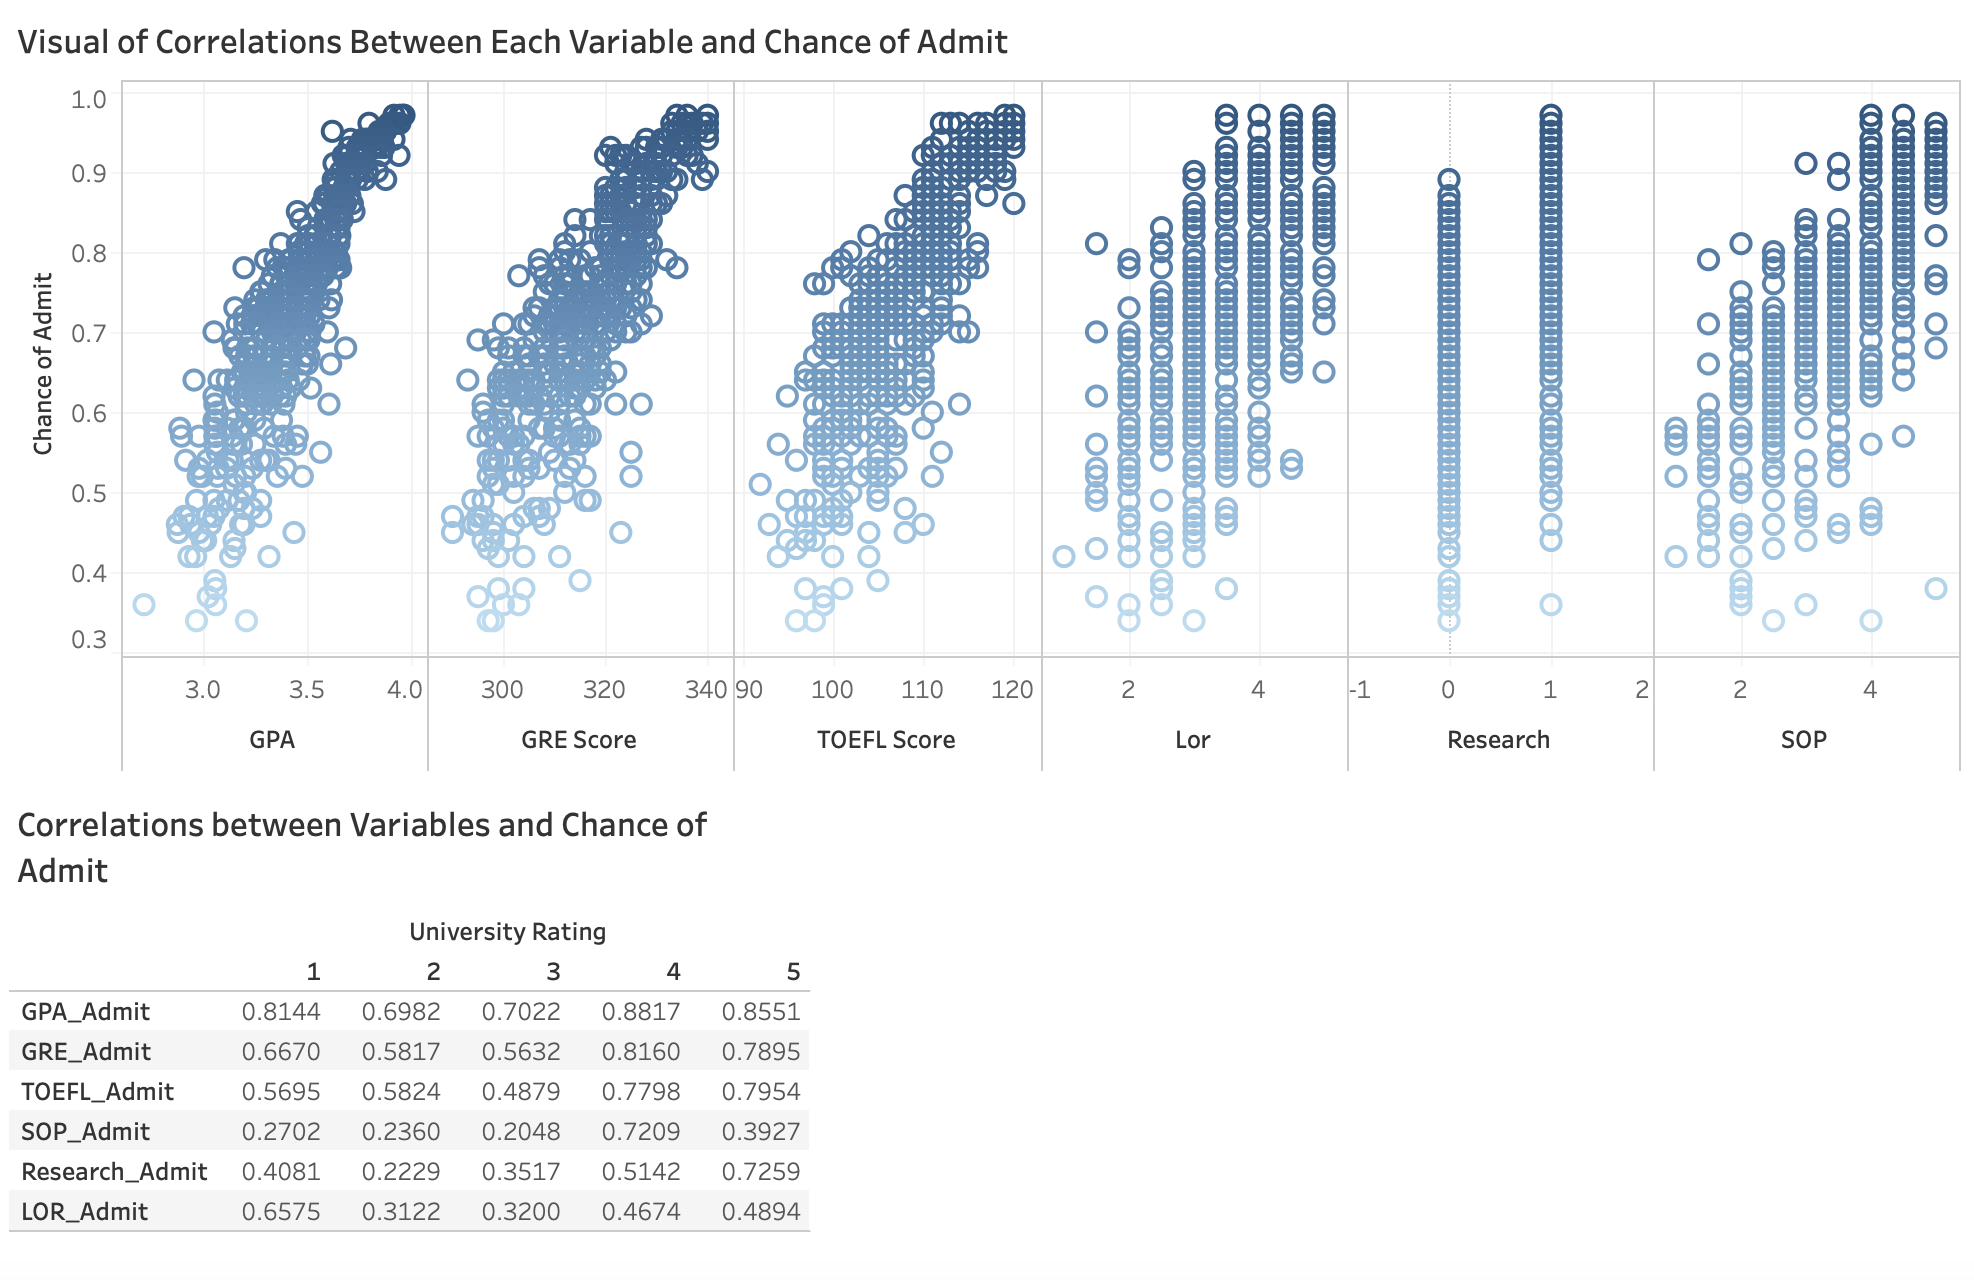

In [17]:
from IPython.display import Image
Image(filename='Correlations DB.png')

>Correlations Between Each Variable & Chance of Admit Dashboard: https://prod-useast-a.online.tableau.com/t/soltaniehha/views/Team_8a_Dashboard/CorrelationandAvgStudentDB_1?:origin=card_share_link&:embed=n

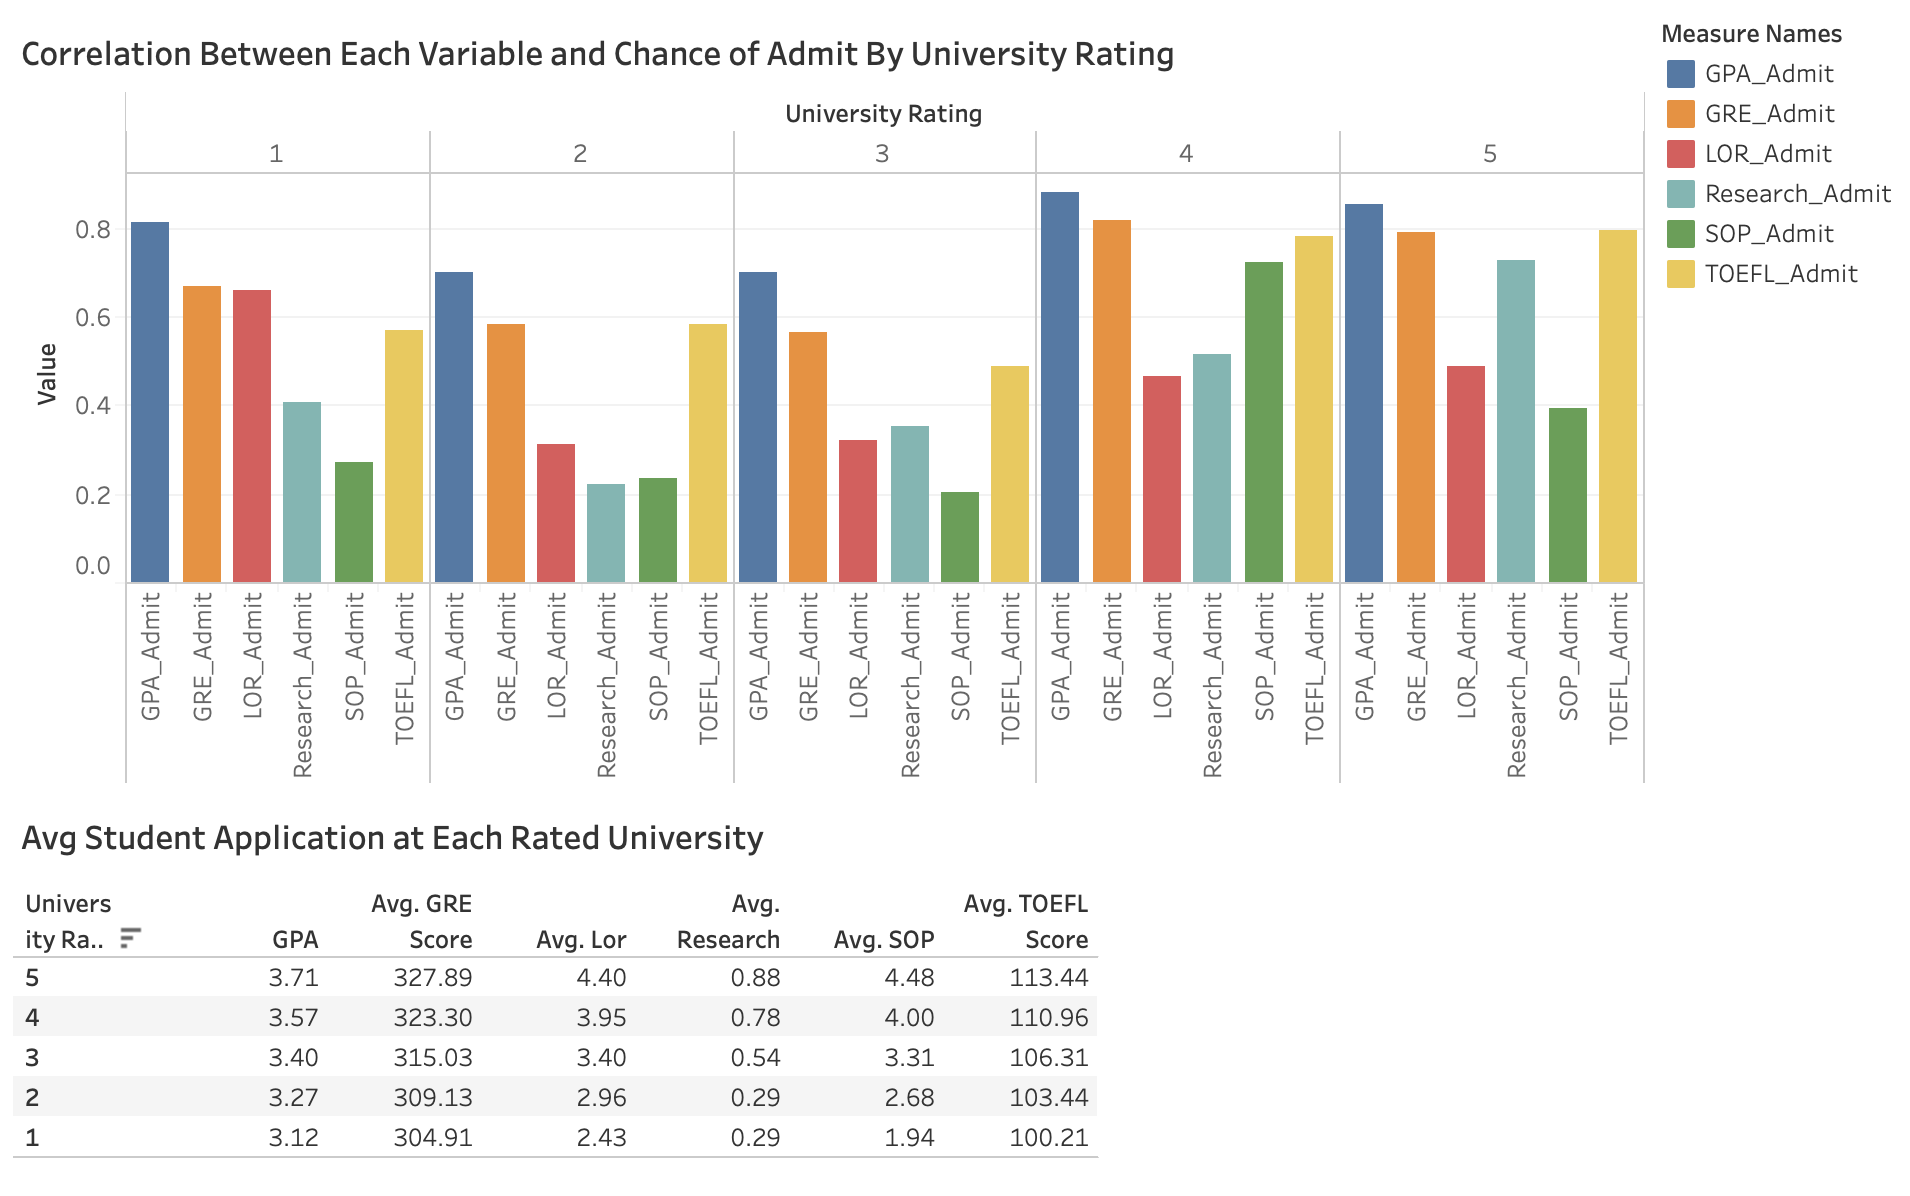

In [18]:
Image(filename='Avg Student and Correlations.png') 

>Confidence Interval Dashboard: https://prod-useast-a.online.tableau.com/t/soltaniehha/views/Team_8a_Dashboard/ConfidenceIntervalDashboard?:origin=card_share_link&:embed=n

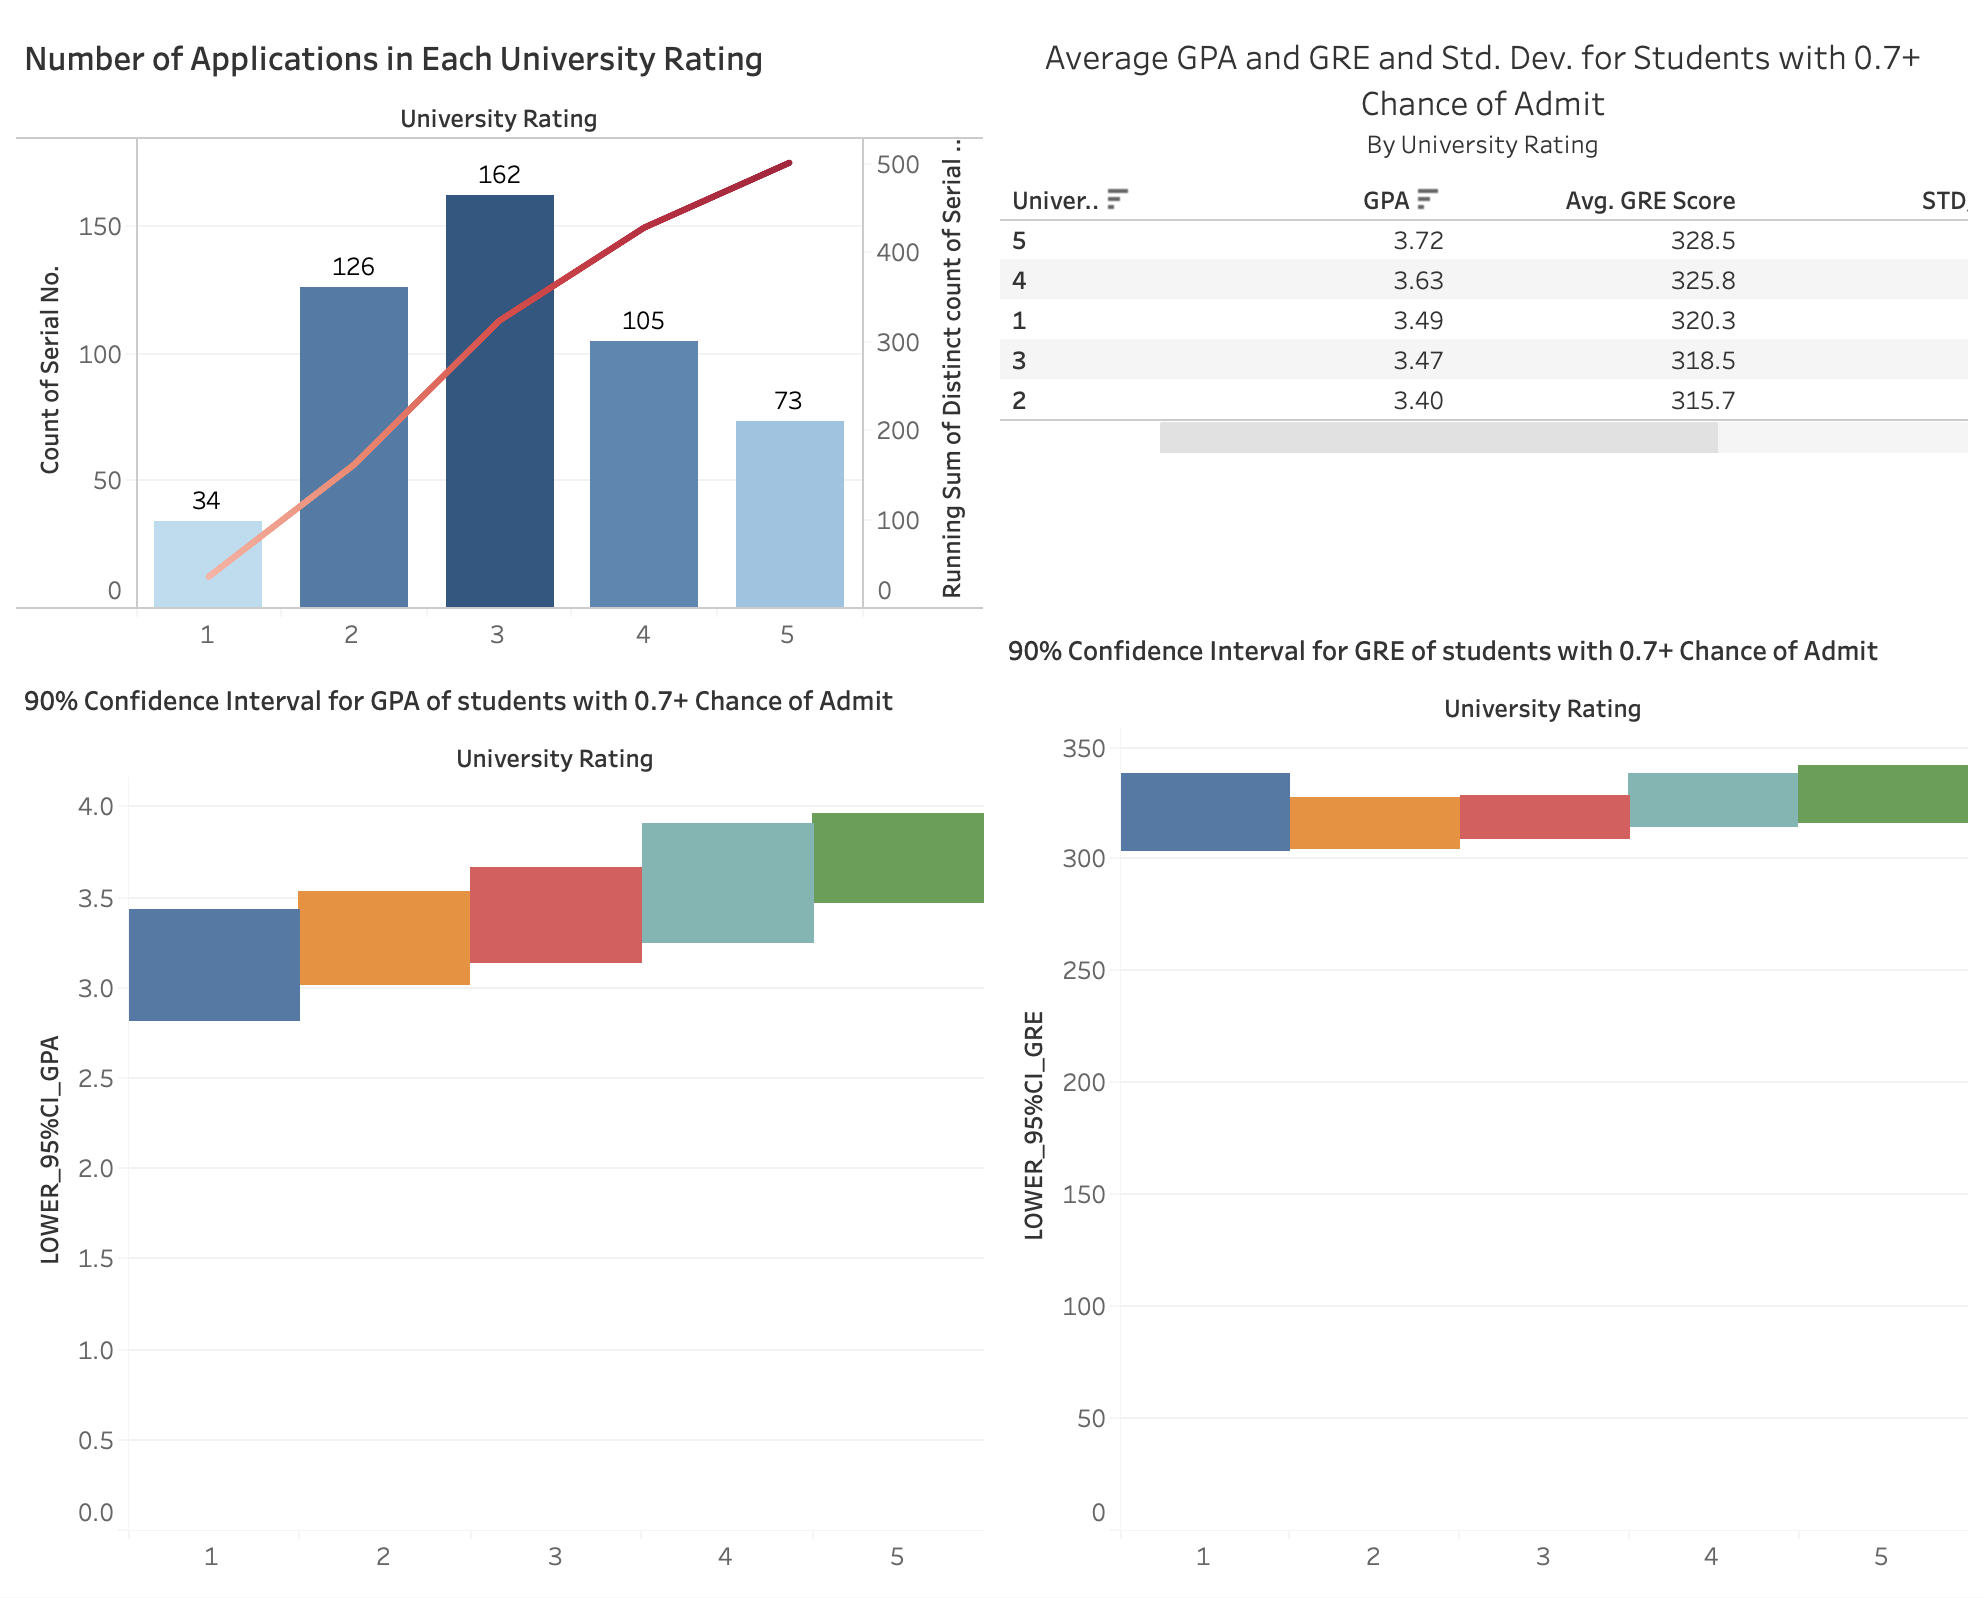

In [19]:
Image(filename='Confidence Interval DB.png')

>Overall Attributes Performance Dashboard: https://prod-useast-a.online.tableau.com/t/soltaniehha/views/Team_8a_Dashboard/OverallAttributesPerformance?:origin=card_share_link&:embed=n

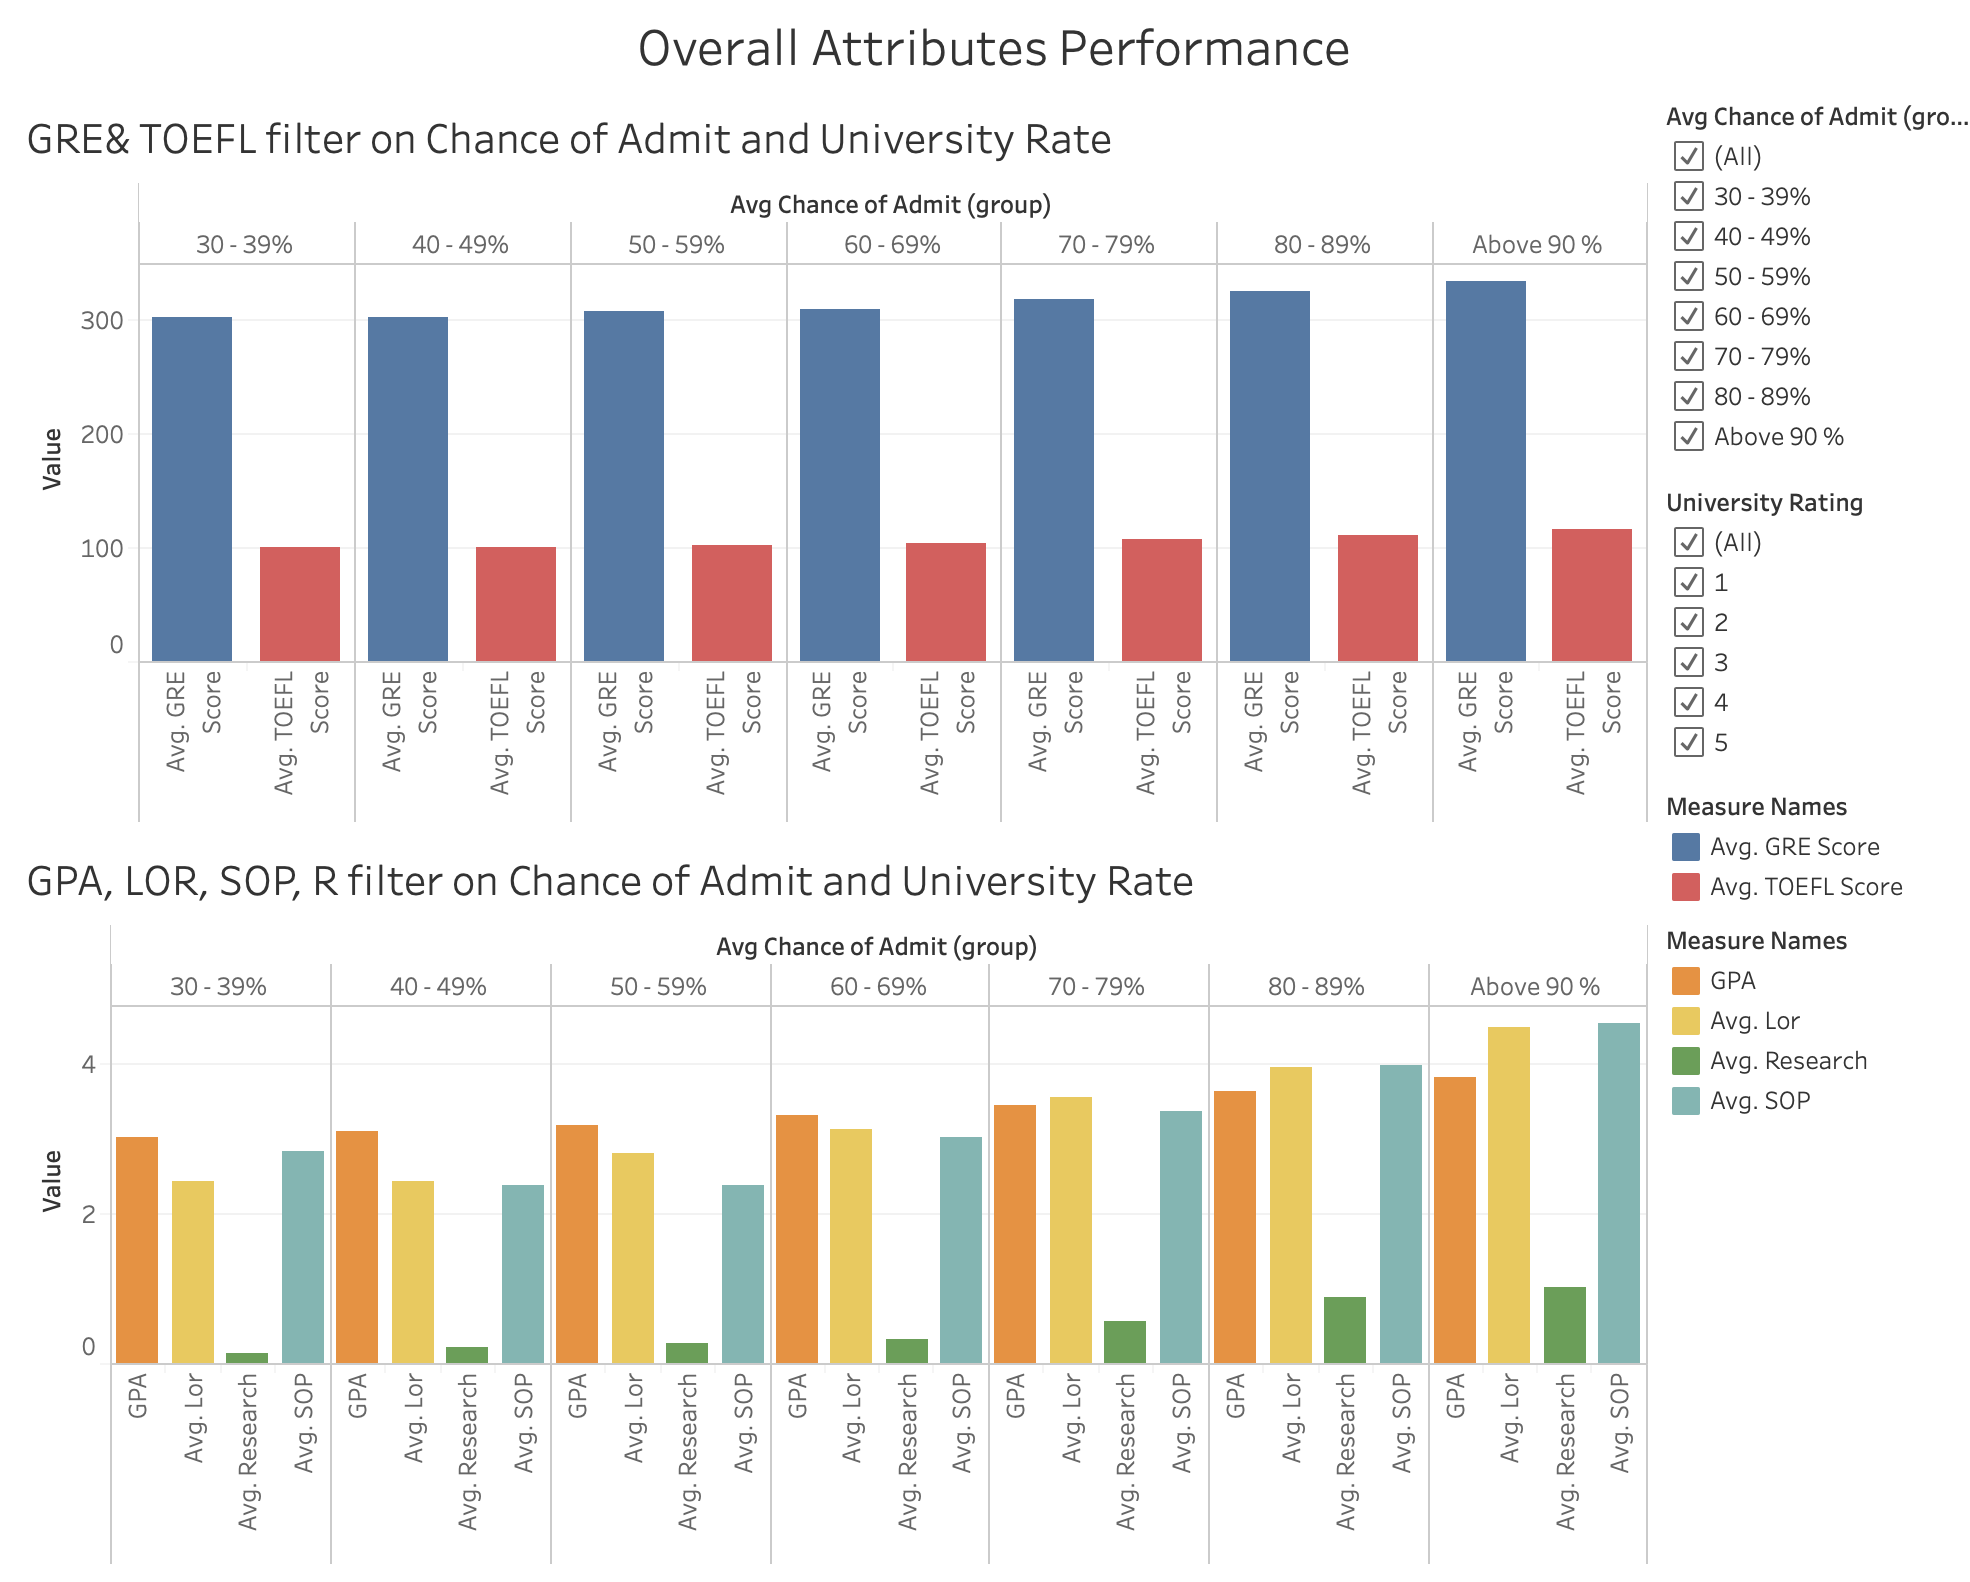

In [20]:
Image(filename='Overall Attributes DB.png')